In [2]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as plt

# モデル
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# model_selection
from sklearn.model_selection import RepeatedKFold, cross_val_score


### 1. データを読み込む

In [3]:
df = pd.read_csv("../data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 2. サンプルデータの表示, カラム名

In [4]:
# サンプルデータの表示
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8412,8414,Zoo Keeper,DS,2004.0,Puzzle,Ignition Entertainment,0.10,0.01,0.05,0.01,0.17
2364,2366,Buzz! The Mega Quiz,PS2,2007.0,Misc,Sony Computer Entertainment,0.32,0.06,0.00,0.50,0.88
2886,2888,LEGO Harry Potter: Years 1-4,PSP,2010.0,Action,Warner Bros. Interactive Entertainment,0.14,0.37,0.00,0.19,0.71
11775,11777,Santa Claus Is Comin' to Town!,DS,2011.0,Puzzle,Crave Entertainment,0.07,0.00,0.00,0.01,0.07
1205,1207,Command & Conquer: Tiberian Sun,PC,1999.0,Strategy,Westwood Studios,1.55,0.00,0.00,0.00,1.55
7940,7942,3rd Super Robot Wars Z: Tengoku-Hen,PSV,2015.0,Action,Namco Bandai Games,0.00,0.00,0.19,0.00,0.19
12745,12747,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,2007.0,Misc,D3Publisher,0.00,0.00,0.06,0.00,0.06
3728,3730,Valkyria Chronicles II,PSP,2010.0,Role-Playing,Sega,0.12,0.16,0.18,0.09,0.54
9500,9502,FIFA World Cup Germany 2006,GC,2006.0,Sports,Electronic Arts,0.10,0.03,0.00,0.00,0.13
9725,9727,Guardian's Crusade,PS,1998.0,Role-Playing,Activision,0.07,0.05,0.00,0.01,0.12


In [5]:
# カラム名の表示
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

### 3. 欠損値の確認

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### 4. Object typeの確認

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### 5. 各からむの要約統計量を表示する

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### 6. 各カラム同士の散布図とそれぞれのカラムのヒストグラムを表示する

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

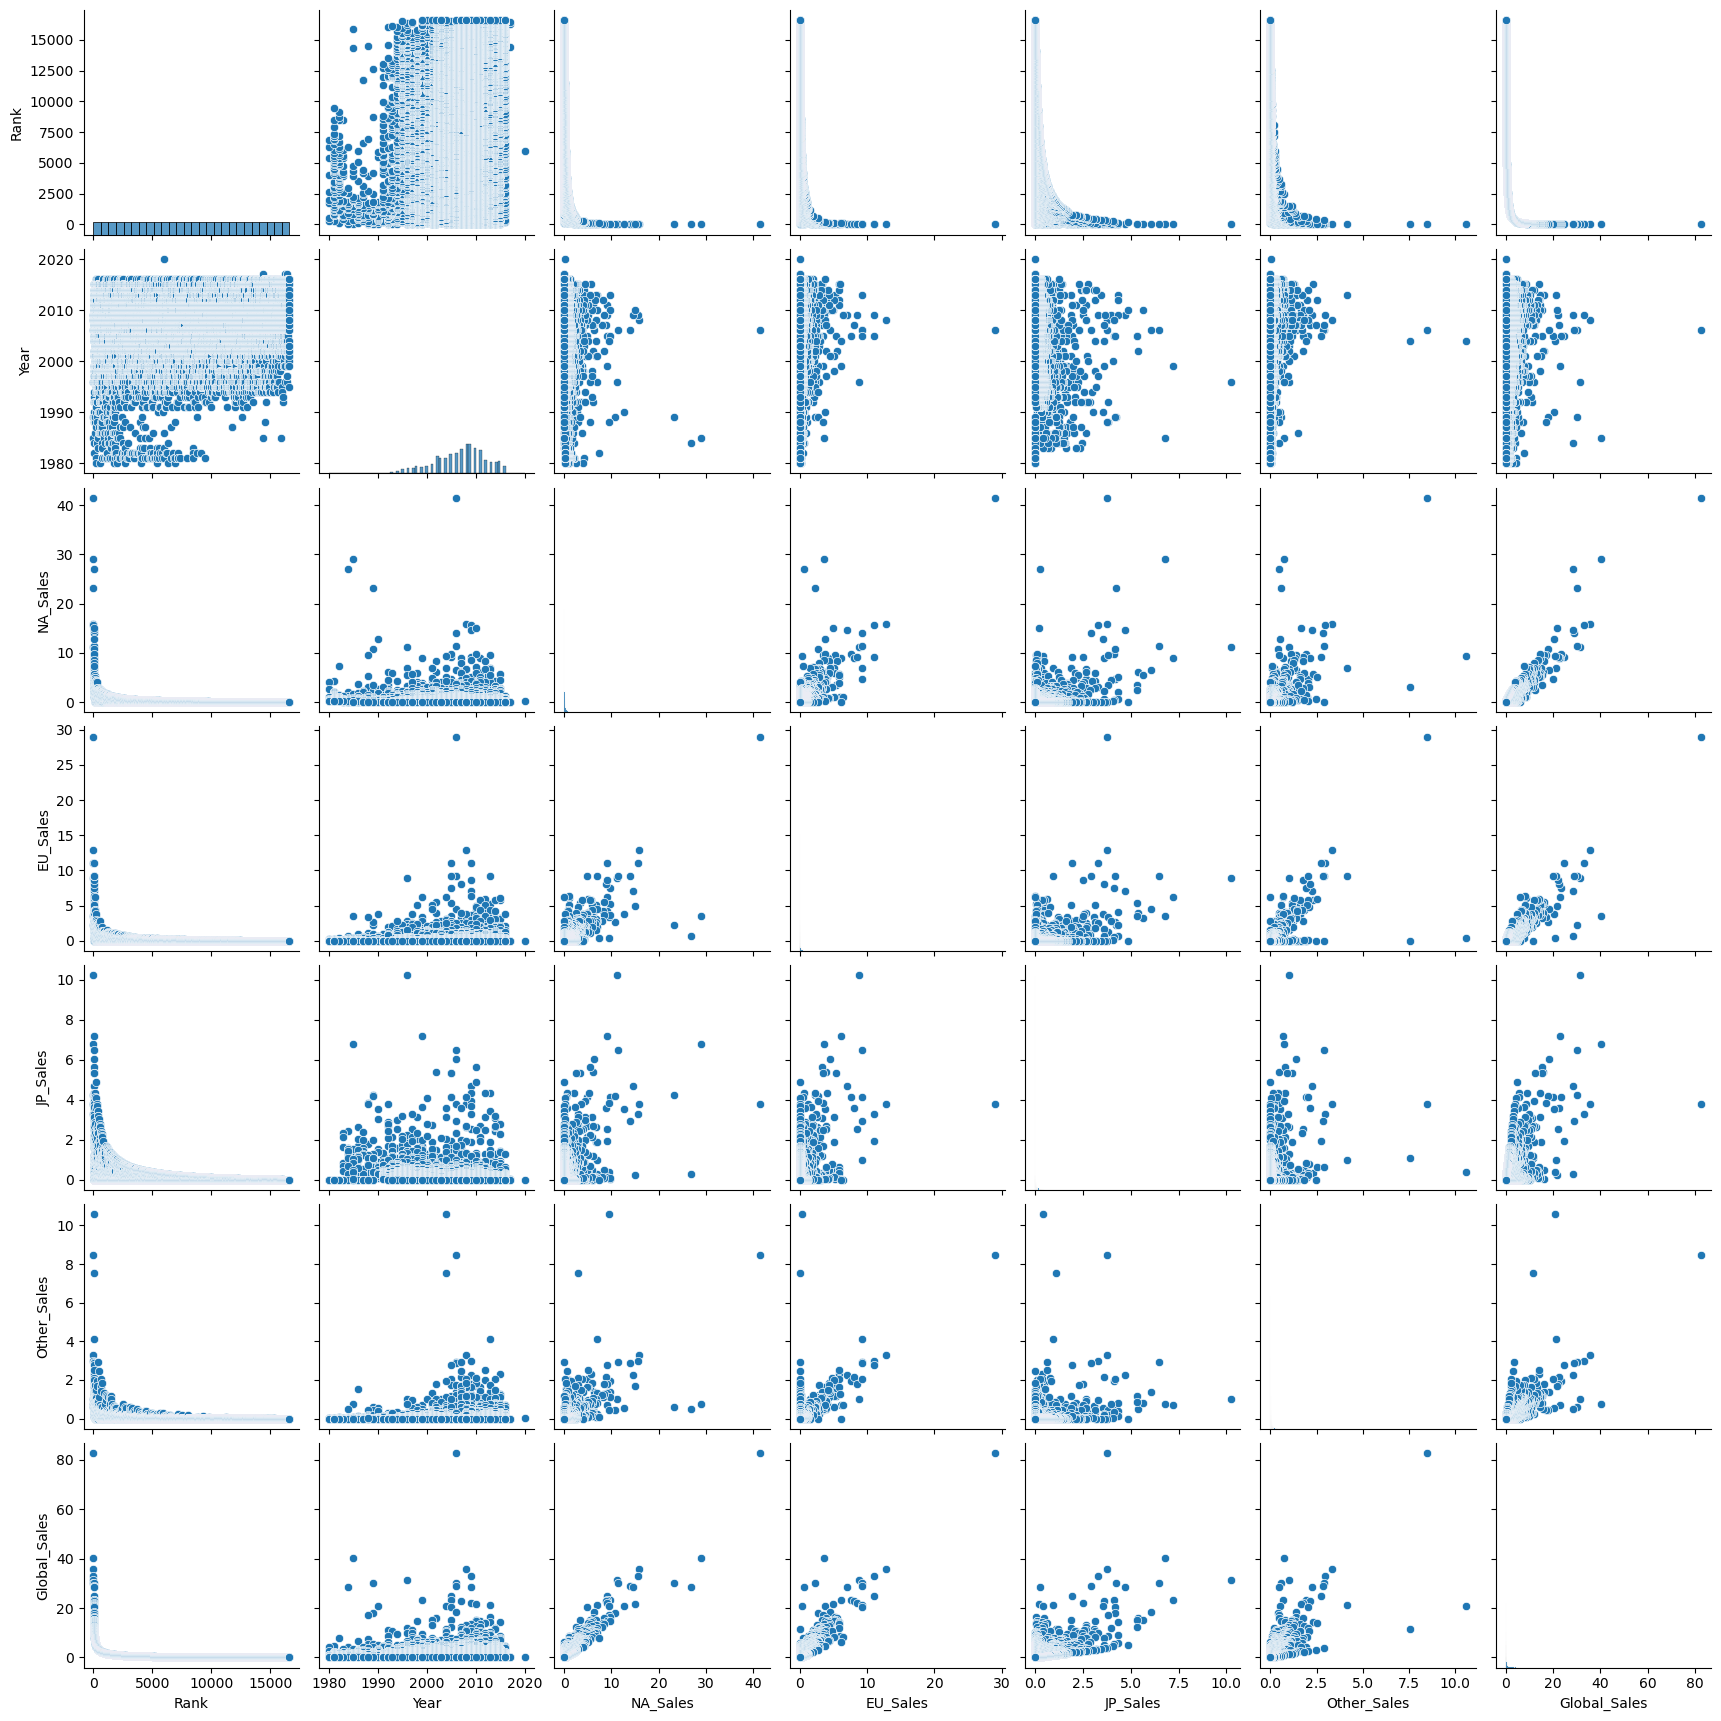

In [10]:
sns.pairplot(df)

# ヒストグラムが表示されるが、今回は値がずれているので、表示が小さい

### 7。それぞれのカテゴリのレコード数を確認

In [11]:
# カテゴリー数
category_columns = df.select_dtypes(include=['object']).columns
df[category_columns].nunique()


Name         11493
Platform        31
Genre           12
Publisher      578
dtype: int64

### 8. 外れ値の確認

In [12]:
df[df['Rank']==16600]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01


In [13]:
df.sort_values('Global_Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009.0,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


### Publisherごとに売上を集計

<Axes: xlabel='Publisher'>

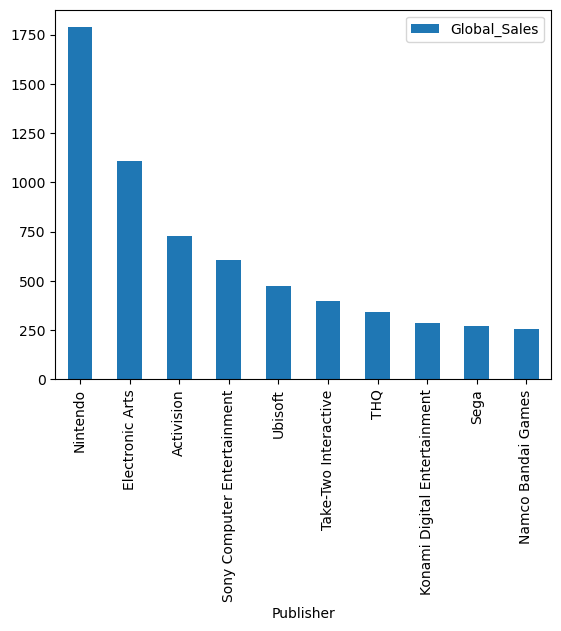

In [14]:

df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)[:10].plot.bar(y='Global_Sales')

In [15]:
df['Year'].value_counts().sort_index()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: count, dtype: int64

In [16]:
df.sort_values('Year', ascending=False)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
8293,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.00,0.14,0.00,0.17
13647,13649,Hitman (2016),PS4,2016.0,Action,Square Enix,0.00,0.04,0.00,0.01,0.04
13596,13598,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016.0,Misc,FuRyu,0.00,0.00,0.04,0.00,0.04
13602,13604,Refrain no Chika Meikyuu to Majo no Ryodan,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04
13614,13616,Utawarerumono: Futari no Hakuoro,PS4,2016.0,Misc,Aqua Plus,0.00,0.00,0.04,0.00,0.04
13620,13622,Kamen Rider: Battride War Genesis,PS3,2016.0,Action,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04


In [17]:
# それぞれのジャンルの数を見る
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [18]:
# プラットフォームを見る
df['Platform'].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

### 9.カラム名の相関

<Axes: >

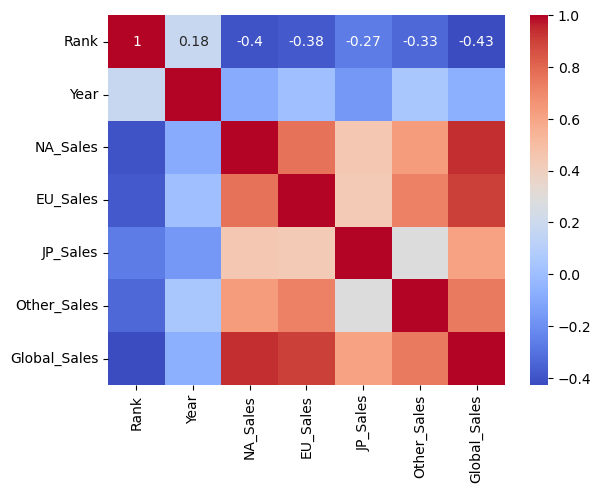

In [19]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
# df[num_columns].corr()
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm')


In [20]:
df.sort_values('Global_Sales', ascending=False)[:30]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Preprocessing

In [21]:
df = pd.read_csv("../data/vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### 1. 欠損値の数を確認する

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [23]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [24]:
len(df[df['Publisher'].isna()])

58

In [25]:
len(df[df['Year'].isna()])

271

In [26]:
# publisherがnanのデータのindexを取得
pub_na_idx = df[df['Publisher'].isna()].index

In [27]:
# df[[]]とすることでデータフレームのまま代入できる
# fillnaでnanを埋める
df[['Publisher']] = df[['Publisher']].fillna('NaN').iloc[pub_na_idx]

In [28]:
df.iloc[pub_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [29]:
# もう一回読み込む
df = pd.read_csv("../data/vgsales.csv")
year_na_idx = df[df['Year'].isna()].index

In [30]:
# Publisherの欠損値をNaN, Yearの欠損値をYearの中央値で埋める
df.fillna({'Publisher': 'NaN', 'Year': df['Year'].median()}, inplace=True)

In [31]:
df.iloc[year_na_idx][:5]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,2007.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [32]:
# Unknowも欠損値
# Unknowを他の欠損値と同じように扱うかを考える
pub_nan_df = df[df['Publisher'] == 'NaN']
pub_unknown_df = df[df['Publisher'] == 'Unknown']
pub_missing_df = pd.concat([pub_nan_df, pub_unknown_df])


In [33]:
pub_missing_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,2007.0,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
...,...,...,...,...,...,...,...,...,...,...,...
16460,16463,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015.0,Action,Unknown,0.00,0.01,0.0,0.00,0.01
16493,16496,The Smurfs,3DS,2007.0,Action,Unknown,0.00,0.01,0.0,0.00,0.01
16532,16535,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.00,0.01
16545,16548,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011.0,Puzzle,Unknown,0.01,0.00,0.0,0.00,0.01


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

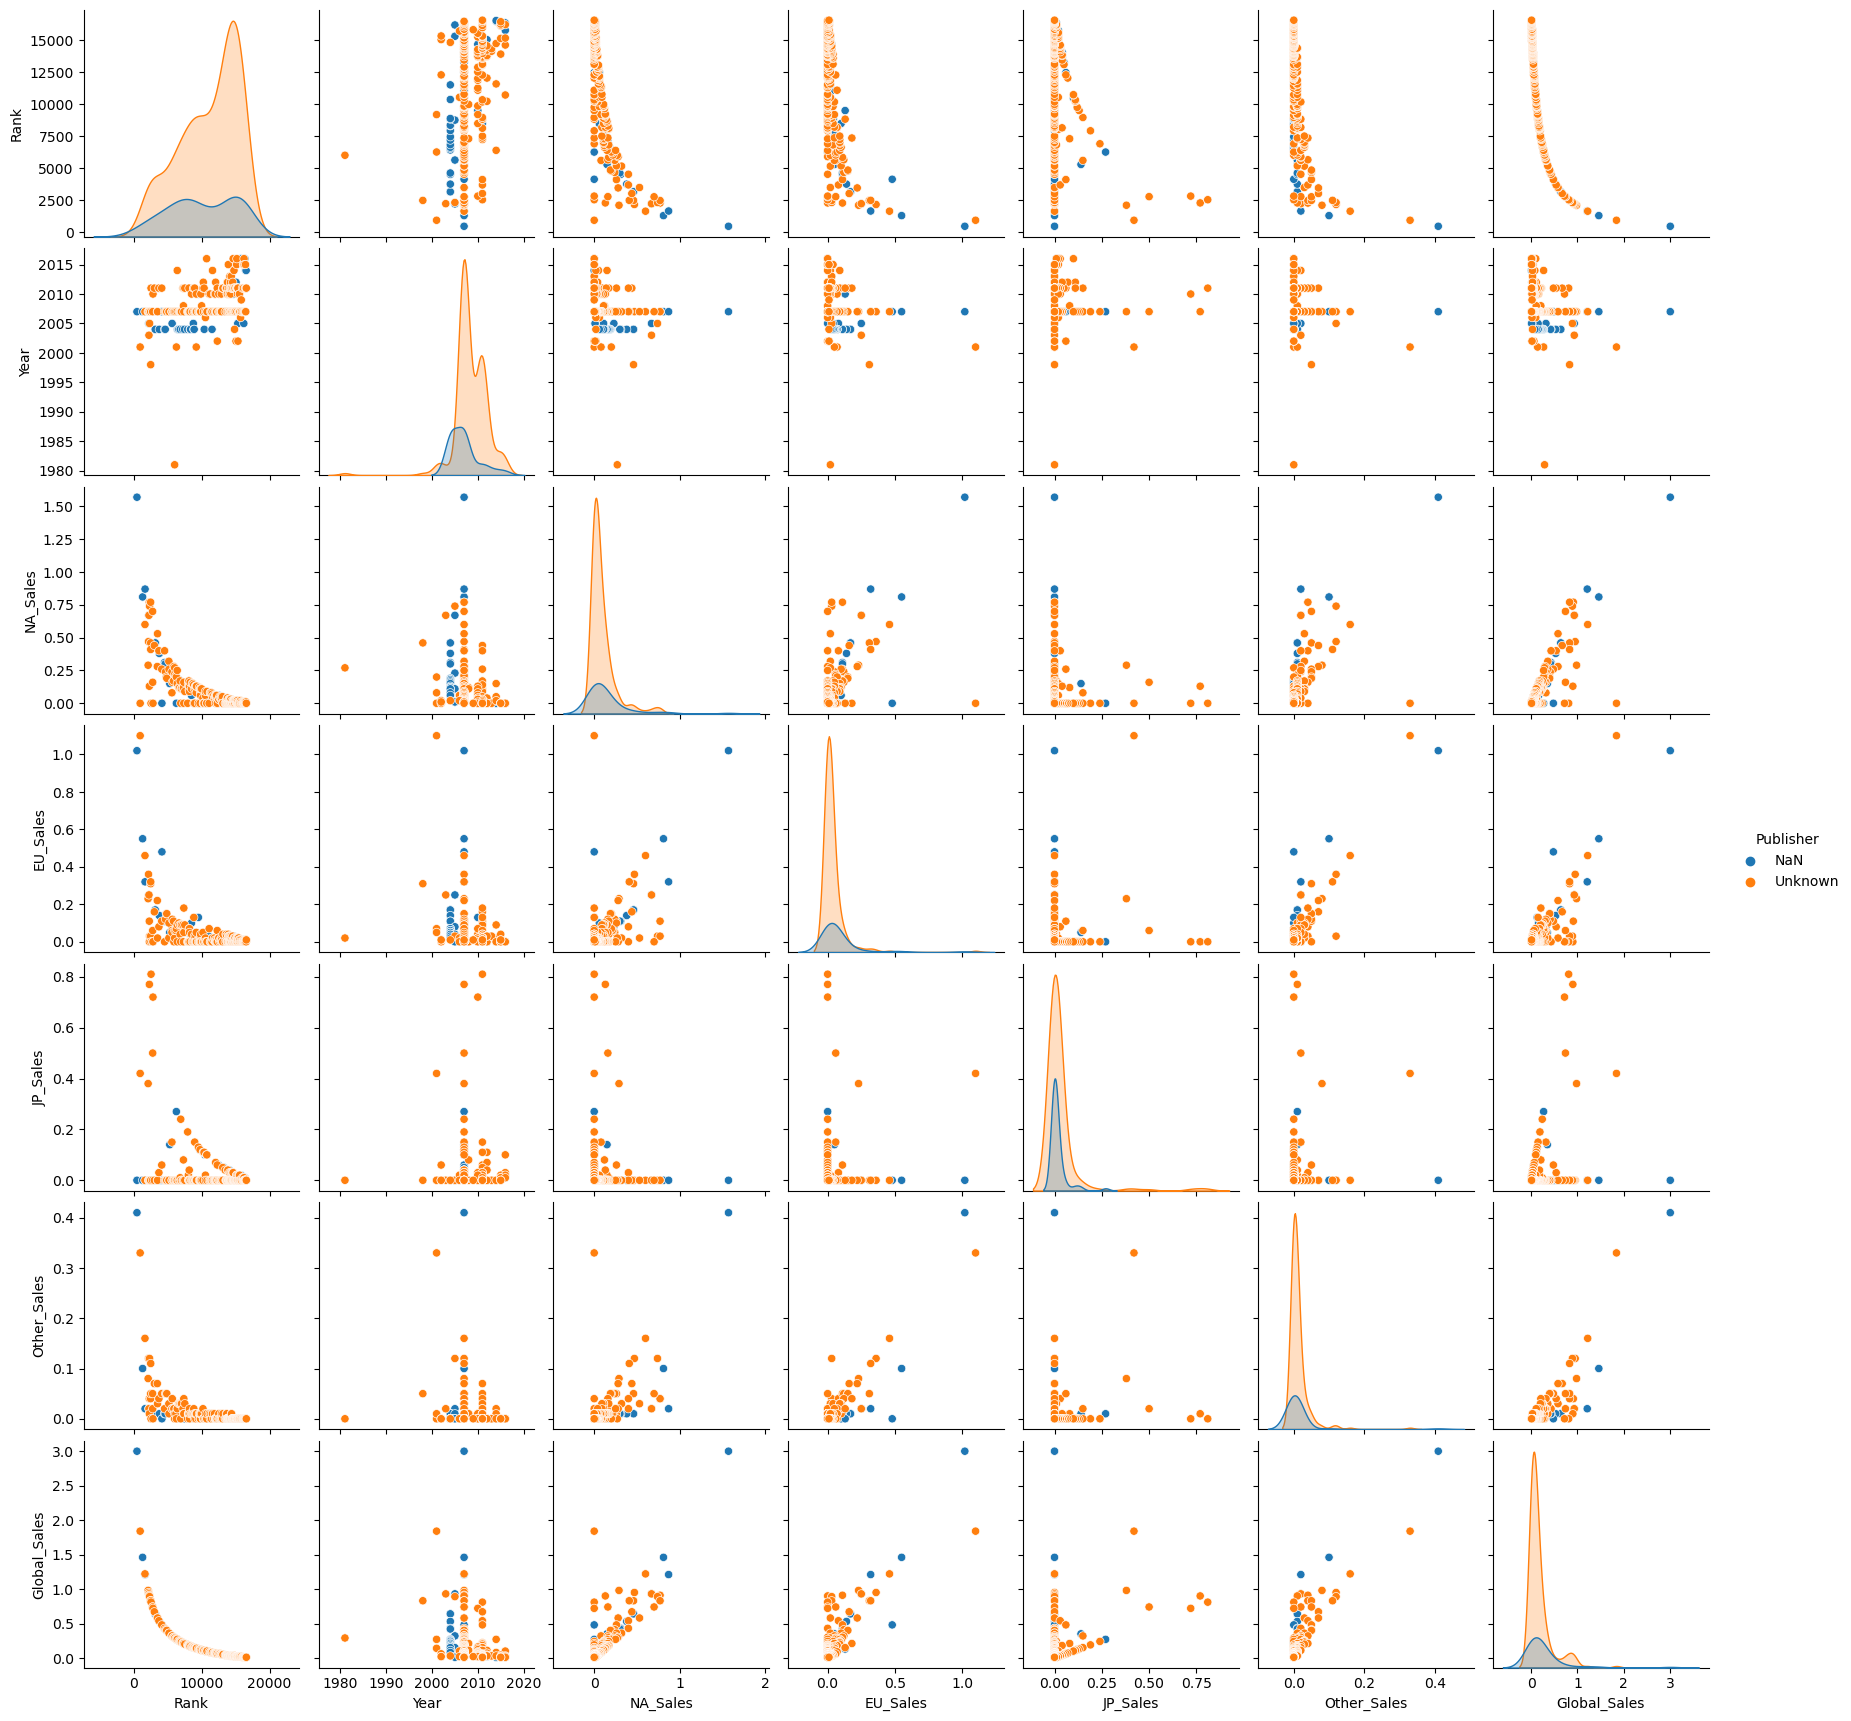

In [34]:
# 視覚的にUnknownとNaNの分布の違いを見る
sns.pairplot(pub_missing_df, hue='Publisher')

In [35]:
# 欠損値を扱うためのライブラリ
from sklearn.impute import SimpleImputer
df = pd.read_csv("../data/vgsales.csv")
# あくまで学習データのみで行う
imputer = SimpleImputer(strategy='median')
df['Year'] = imputer.fit_transform(df[['Year']])

In [36]:
df.iloc[year_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,2007.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,2007.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,2007.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,2007.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,2007.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [37]:
# publisherも同様にする

imputer = SimpleImputer(strategy="most_frequent")
df['Publisher'] = imputer.fit_transform(df[['Publisher']])[:, 0]


In [38]:
df.iloc[pub_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,Electronic Arts,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,2007.0,Sports,Electronic Arts,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,Electronic Arts,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,Electronic Arts,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,Electronic Arts,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,Electronic Arts,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,Electronic Arts,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,2007.0,Platform,Electronic Arts,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,Electronic Arts,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,Electronic Arts,0.30,0.11,0.00,0.01,0.42


In [39]:
### PlatformごとにYearの中央値を計算して埋める
# platform_year_dict = df.groupby('Platform').median()['Year'].to_dict()

TypeError: agg function failed [how->median,dtype->object]

In [ ]:
df.apply

<bound method DataFrame.apply of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sa

In [42]:
import pandas as pd

# データ読み込み
df = pd.read_csv("../data/vgsales.csv")

# Year列のデータ型を確認し、必要に応じて数値型に変換
if df['Year'].dtype != 'float64' and df['Year'].dtype != 'int64':
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# 欠損値の処理（NaNを除外して中央値を計算）
platform_year_dict = df.groupby('Platform')['Year'].median().to_dict()



In [43]:
df['Year'] = df.apply(
    lambda row: platform_year_dict[row['Platform']] if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], 
    axis=1
)


In [44]:
df.iloc[year_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2005.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2005.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2009.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,1982.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,2003.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,2009.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,2011.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,2003.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


### 欠損値対応

### 1. 'Year'の欠損値をKNNで補完する


In [45]:
# 今回は目的変数はなしとして,knnで欠損値を埋める
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# 特徴量スケーリング
from sklearn.preprocessing import StandardScaler

# データ分割
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv("../data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [48]:
# Publihserの欠損値を埋める
df[['Publisher']] = df[['Publisher']].fillna('NaN')

In [49]:
df = pd.read_csv("../data/vgsales.csv")
y_nan_col = 'Year'

# get_dummiesでダミー変数するとnameカテゴリのせいで、カラムが大量に増える
# nameカテゴリがあるが、nameカテゴリは予測に関係ないので、削除する, 過学習を防ぐためにも削除する
df.drop('Name', axis=1, inplace=True)

X = df.drop(y_nan_col, axis=1)
y = df[y_nan_col]


# 数値カラムだけを抽出して、標準化する(get_dummiesでダミー変数をした後に標準化はしない)
num_columns = X.select_dtypes(include=np.number).columns.to_list()

# dummy変数化
X = pd.get_dummies(X, drop_first=True)

# 数値カラムだけ標準化
scaler = StandardScaler()
X[num_columns] = scaler.fit_transform(X[num_columns])

# データ分割
# df['Year']が欠損値のデータのインデックスを取得
test_indexes = df[df['Year'].isna()].index
# df['Year']が欠損値ではないデータのインデックスを取得
train_indexes = df[~df['Year'].isna()].index

X_train, X_test = X.iloc[train_indexes], X.iloc[test_indexes]
y_train, y_test = y.iloc[train_indexes], y.iloc[test_indexes]

# モデルの学習
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [50]:
X_test.head(1)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
179,-1.69472,4.892293,0.224302,-0.219159,3.510062,3.01776,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# このyearに使われたデータを取得する
# 今回はindexが210, 239, 278のデータが使われた
knn.kneighbors(X_test.head(1))

(array([[0.47983803, 1.05095264, 1.53257282]]), array([[210, 239, 278]]))

In [52]:
df.iloc[[210, 239, 278]]

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
210,211,PS3,2007.0,Action,Sony Computer Entertainment,2.31,1.73,0.12,0.78,4.94
239,240,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50
278,279,PS,1997.0,Action,Hasbro Interactive,3.79,0.27,0.00,0.11,4.16


In [53]:
X_test.head(1)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
179,-1.69472,4.892293,0.224302,-0.219159,3.510062,3.01776,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# get_dummiesでダミー変数するとnameカテゴリのせいで、カラムが大量に増える
# nameカテゴリがあるが、nameカテゴリは予測に関係ないので、削除する, 過学習を防ぐためにも削除する

# 数値カラムだけを抽出して、標準化する(get_dummiesでダミー変数をした後に標準化はしない)
pd.get_dummies(X, drop_first=True)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,-1.732076,50.480508,57.136930,11.938058,44.606085,52.864025,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.731867,35.284437,6.794188,21.767296,3.828224,25.532503,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.731659,19.084273,25.197785,12.002724,17.297115,22.690025,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.731450,18.961823,21.497277,10.353740,15.441165,20.876498,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.731241,13.476053,17.302048,32.792857,5.047848,19.828254,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,1.731197,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16594,1.731406,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16595,1.731615,-0.324086,-0.290207,-0.251492,-0.254864,-0.339194,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16596,1.731823,-0.324086,-0.270418,-0.251492,-0.254864,-0.339194,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### 2. KNNimputerを使って欠損値を埋める

In [55]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

# データフレームで出力するようにする
imputer.set_output(transform='pandas')

# ダミー変数
df = pd.get_dummies(df, drop_first=True)
# 標準化
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

# すべての欠損値を埋める
# fit_transformがあるものは、set_outputでデータフレームで出力するようにできる
df_imputed = imputer.fit_transform(df)





In [56]:
df_imputed.iloc[test_indexes]

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
179,-1.694720,2004.333333,4.892293,0.224302,-0.219159,3.510062,3.017760,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,-1.653398,2005.000000,0.398370,4.379953,-0.122160,2.449519,1.898775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,-1.642129,2008.666667,1.953488,1.728252,-0.251492,1.282922,1.692985,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,-1.633990,2003.333333,1.598383,1.728252,-0.251492,1.919248,1.583659,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,-1.605399,1980.666667,2.565739,-0.013164,-0.251492,-0.095783,1.281404,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,1.671511,2003.333333,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16327,1.675685,2009.666667,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16366,1.683824,2014.000000,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16427,1.696554,2009.333333,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
y_pred

array([2004.33333333, 2005.        , 2008.66666667, 2003.33333333,
       1980.66666667, 2009.33333333, 1990.66666667, 2009.        ,
       2009.66666667, 2009.        , 2010.66666667, 2009.66666667,
       1999.        , 2010.66666667, 2008.        , 1982.33333333,
       1982.        , 2002.33333333, 2003.33333333, 2008.        ,
       1998.66666667, 1997.66666667, 2013.66666667, 1982.        ,
       2005.        , 2010.66666667, 2014.33333333, 2002.        ,
       2001.        , 2009.66666667, 2014.33333333, 2014.66666667,
       2006.66666667, 2003.66666667, 2010.33333333, 2009.        ,
       2009.33333333, 2001.66666667, 2011.33333333, 2008.        ,
       2004.        , 2011.        , 2006.66666667, 2006.        ,
       2002.33333333, 2009.        , 2007.33333333, 2003.33333333,
       2004.33333333, 2004.33333333, 2003.        , 1983.66666667,
       2012.33333333, 2010.        , 1983.33333333, 2009.        ,
       1982.33333333, 2003.33333333, 1982.33333333, 2011.66666

### Charenge

### 欠損値代入の比較

ペンギンデータセット('penguins_size.csv')を使用して、以下の異なる欠損値対応方法による精度を比較します。

#### 比較するケース

1. **欠損値を落としたケース**
   - `.dropna()`
2. **欠損値を新しいカテゴリとしたケース**
   - 数値カラムは中央値で代入
3. **`sklearn.impute.SimpleImputer()`を使用したケース**
   - `.fit_transform()`
4. **欠損値をkNNで予測したケース**
   - カテゴリカルカラムは最頻値で代入
   - `sklearn.impute.KNNImputer(n_neighbors).fit_transform()`

#### モデル

- 任意のモデルを使用可能（回答例ではロジスティック回帰を使用）

#### 評価方法

- 5-fold cross-validationを3回繰り返す
- `Pipeline`や`ColumnTransformer`クラスを使用
- 評価指標はloglossを使用


### Penguins Size Dataset (`penguins_size.csv`)

このデータセットはペンギンのサイズと種別に関する情報を記録しています。

#### データセットの内容

- `species`: ペンギンの種別（Chinstrap, Adelie, Gentoo）
- `culmen_length_mm`: くちばしの長さ (mm)
- `culmen_depth_mm`: くちばしの高さ (mm)
- `flipper_length_mm`: 翼の長さ (mm)
- `body_mass_g`: 体重 (g)
- `island`: 調査した島（Dream, Torgersen, Biscoe） @南極大陸
- `sex`: 性別


In [58]:
# データ読み込み
df = pd.read_csv("../data/penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


データの確認

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

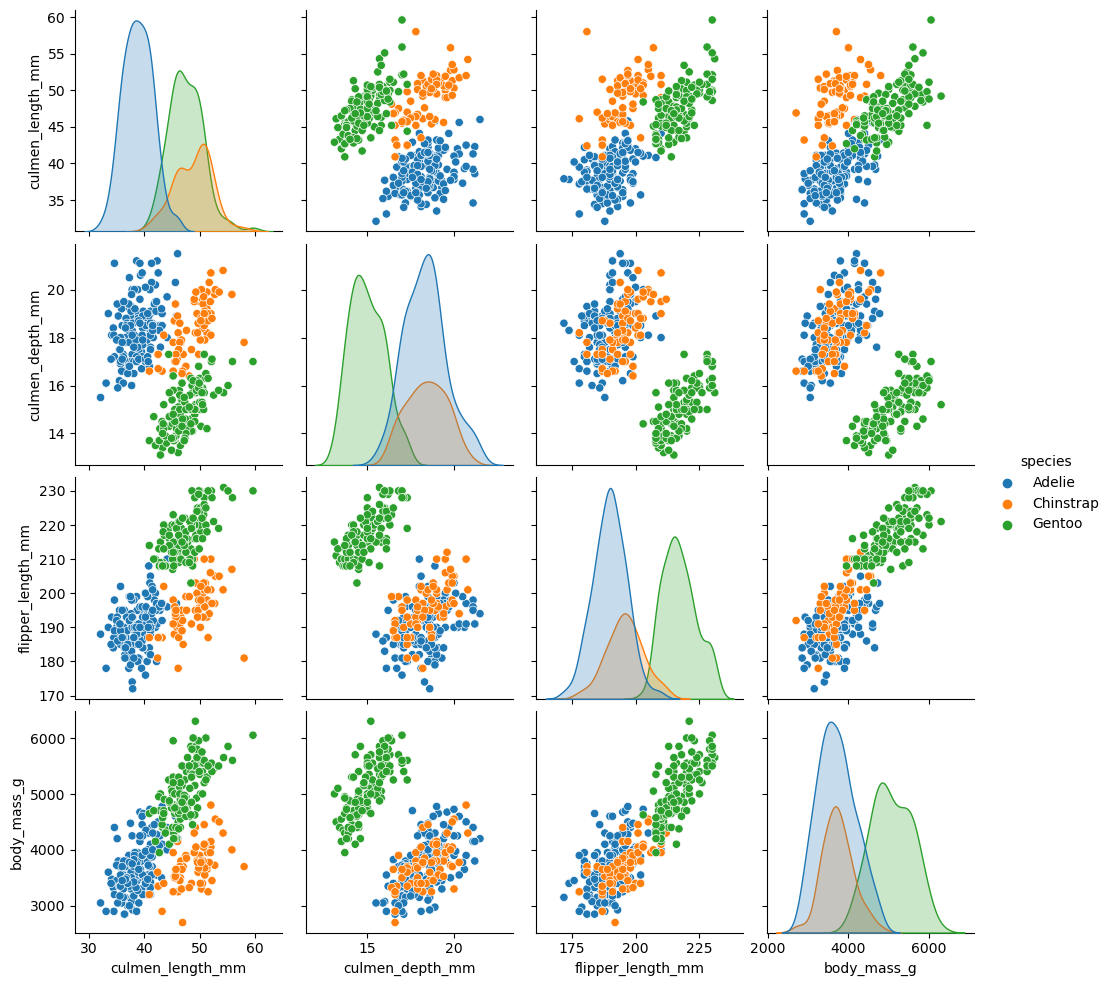

In [60]:
%matplotlib inline
sns.pairplot(df, hue='species')

<Axes: >

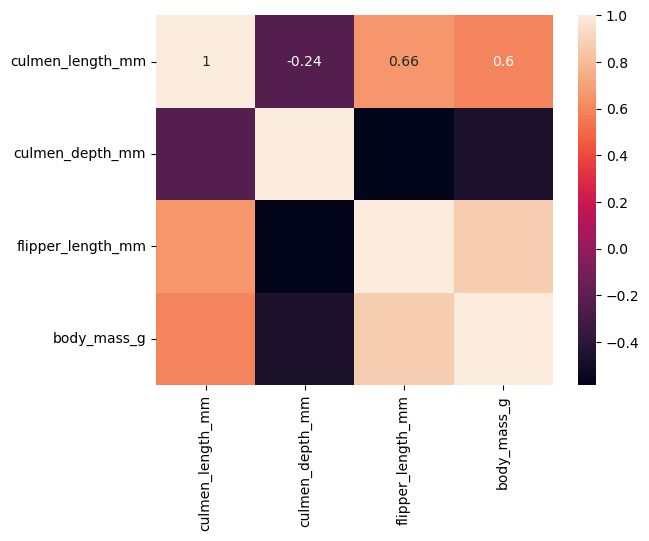

In [61]:
# seabornで相関係数を見る
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [62]:
df.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [63]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


欠損値をdorpnaで削除するケース

In [76]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [65]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [79]:
# sexからむで.となっているデータをNanとする
df.loc[df[df['sex']=='.'].index, 'sex'] = np.nan

In [81]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("../data/penguins_size.csv")
# sexからむで.となっているデータをNanとする
df.loc[df[df['sex']=='.'].index, 'sex'] = np.nan
df.dropna(inplace=True)

target = 'species'
X = df.drop(target, axis=1)
y = df[target]

# ダミー変数の生成(columntransofomerで作成)
# 標準化(columntransofomerで作成)

# columntransofomerでダミー変数と標準化を同時に行う
# 数値カラムとカテゴリカルカラムを分ける
num_columns = X.select_dtypes(include=np.number).columns.to_list()
cat_columns = X.select_dtypes(exclude=np.number).columns.to_list()

# ColumnTransformerの作成

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(drop='first'), cat_columns)
    ]
)

# パイプラインの作成
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# クロスバイリデーションの設定
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

# モデルの評価
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')

# 平均値を出力
print(f'平均値: {-np.mean(scores)}')



平均値: 0.03460703617210278


### 答え

In [84]:
# 結果を格納するでディクショナリー
results = {}

In [86]:
df = pd.read_csv("../data/penguins_size.csv")
df.loc[df[df['sex']=='.'].index, 'sex'] = np.nan
df.dropna(inplace=True)

target = 'species'
X = df.drop(target, axis=1)
y = df[target]

# ダミー変数
X = pd.get_dummies(X, drop_first=True)

# CV
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')
results['drop'] = -np.mean(scores)

欠損値を新カテゴリーとする and 数値カラムは中央値で代入



In [106]:
df = pd.read_csv("../data/penguins_size.csv")
df.loc[df[df['sex']=='.'].index, 'sex'] = np.nan
df.dropna(inplace=True)


target = 'species'
X = df.drop(target, axis=1)
y = df[target]

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
# ダミー変数生成クラスを自作(pipelineに入れるため)
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.columns = None

    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)

# 欠損値を代入処理はcross_val_scoreの中で行う
# pipelineはデータフレーム全体の処理
# 数値カラムだけの処理pipelineでできない→ColumnTransformerで行う
num_columns = X.select_dtypes(include=np.number).columns.to_list()
cat_columns = X.select_dtypes(exclude=np.number).columns.to_list()

ct = ColumnTransformer(
    transformers=[
        ('imputer_num', SimpleImputer(strategy='median', fill_value='Nan'), num_columns),
        ('imputer_cat', SimpleImputer(strategy='constant', fill_value='Nan'), cat_columns)
    ]
)

ct.set_output(transform='pandas')

# pipeline(dummies + scaele + model)
# pipelineはfitとtransformeするものしか入らない
# get_dummies自分でクラスを作る必要がある
pipeline = Pipeline(steps=[
    ('ct', ct),
    ('dummies', GetDummies()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')
results['median'] = -np.mean(scores)
results




{'drop': 0.03038002644262775, 'median': 0.02918081726217299}

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.columns = None

    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new

In [103]:
gb = GetDummies()
gb.fit_transform(X)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,True,False,False,True,False


### 欠損値をKNNで予測したケース(カテゴリカルカラムは最頻値を使用)m

In [116]:
df = pd.read_csv("../data/penguins_size.csv")
df.loc[df[df['sex']=='.'].index, 'sex'] = np.nan
df.dropna(inplace=True)


target = 'species'
X = df.drop(target, axis=1)
y = df[target]

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
# ダミー変数生成クラスを自作(pipelineに入れるため)
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.columns = None

    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)

# 欠損値を代入処理はcross_val_scoreの中で行う
# pipelineはデータフレーム全体の処理
# 数値カラムだけの処理pipelineでできない→ColumnTransformerで行う
num_columns = X.select_dtypes(include=np.number).columns.to_list()
cat_columns = X.select_dtypes(exclude=np.number).columns.to_list()

from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

# KNNimputerの前に標準化する
# 数値カラム用のパイプライン
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer_num', KNNImputer())
])

ct = ColumnTransformer(
    transformers=[
        ('imputer_cat', SimpleImputer(strategy='most_frequent'), cat_columns),
        ('num_pipeline', num_pipeline, num_columns)
    ]
)

ct.set_output(transform='pandas')

# pipeline(dummies + scaele + model)
# pipelineはfitとtransformeするものしか入らない
# get_dummies自分でクラスを作る必要がある
pipeline = Pipeline(steps=[
    ('ct', ct),
    ('dummies', GetDummies()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')
results['knn'] = -np.mean(scores)
results




{'drop': 0.03038002644262775,
 'median': 0.02918081726217299,
 'knn': 0.029180817262155715}

ColumnTransformer(transformers=[('imputer_cat',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['island', 'sex']),
                                ('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer_num',
                                                  KNNImputer())]),
                                 ['culmen_length_mm', 'culmen_depth_mm',
                                  'flipper_length_mm', 'body_mass_g'])])